In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

In [2]:
def curve(x, t, t1):
    return 1-(np.exp((x-t)/t1))

In [3]:
race1= pd.read_csv('times.csv', na_values=['#VALUE!', '---','DNF', 'DNS'])
race1.head()

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
0,2011,Craig Alexander,1,1,1,1,PRO,43.0,NSW,AUS,...,112 mi,00:01:58,02:44:02,2.73,0.366300,26.2 mi,08:03:56,8.07,0.123916,-19.0
1,2011,Pete Jacobs,2,2,2,11,PRO,34.0,QLD,AUS,...,112 mi,00:02:06,02:42:29,2.71,0.369004,26.2 mi,08:09:11,8.15,0.122699,-28.0
2,2011,Andreas Raelert,3,3,3,10,PRO,40.0,NaN,DEU,...,112 mi,00:02:26,02:47:47,2.80,0.357143,26.2 mi,08:11:07,8.19,0.122100,-22.0
3,2011,Dirk Bockel,4,4,4,33,PRO,39.0,FL,LUX,...,112 mi,00:01:54,02:53:03,2.88,0.347222,26.2 mi,08:12:58,8.22,0.121655,-23.0
4,2011,Timo Bracht,5,5,5,9,PRO,41.0,NaN,DEU,...,112 mi,00:02:21,02:47:25,2.79,0.358423,26.2 mi,08:20:12,8.34,0.119904,-21.0


In [4]:
race1.age.max()

86.0

In [5]:
df1= race1[(race1.age>=30)&(race1.age<=34)&(race1.division!='PRO')&(race1.year==2011)]
df1

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
37,2011,Joe Thorne,36,1,38,1797,25-29,32.0,CA,USA,...,112 mi,00:03:15,02:43:28,2.72,0.367647,26.2 mi,08:59:16,8.99,0.111235,-30.0
50,2011,Steffen Haak,48,2,51,1755,25-29,34.0,NaN,DEU,...,112 mi,00:02:52,02:58:21,2.97,0.336700,26.2 mi,09:05:10,9.09,0.110011,-28.0
51,2011,Marc Duelsen,49,3,52,1818,25-29,31.0,DE,DEU,...,112 mi,00:02:38,03:08:35,3.14,0.318471,26.2 mi,09:05:27,9.09,0.110011,-31.0
52,2011,Mike Lavery,50,4,53,1812,25-29,31.0,NaN,USA,...,112 mi,00:03:26,03:08:40,3.14,0.318471,26.2 mi,09:06:05,9.10,0.109890,-31.0
62,2011,Kai Luddecke,58,5,63,1754,25-29,34.0,DE,DEU,...,112 mi,00:02:18,03:22:12,3.37,0.296736,26.2 mi,09:09:21,9.16,0.109170,-28.0
71,2011,Greg Close,67,6,72,1779,25-29,33.0,NY,USA,...,112 mi,00:02:27,03:06:42,3.11,0.321543,26.2 mi,09:11:33,9.19,0.108814,-29.0
78,2011,Sam Baxter,74,7,79,1775,25-29,33.0,NaN,GBR,...,112 mi,00:02:24,03:08:49,3.15,0.317460,26.2 mi,09:12:29,9.21,0.108578,-29.0
81,2011,Brian Scheall,77,8,82,1778,25-29,33.0,FL,USA,...,112 mi,00:02:41,03:00:43,3.01,0.332226,26.2 mi,09:13:01,9.22,0.108460,-29.0
82,2011,Stefan Eichheimer,78,9,83,1762,25-29,34.0,NaN,DEU,...,112 mi,00:03:52,03:14:23,3.24,0.308642,26.2 mi,09:13:05,9.22,0.108460,-28.0
87,2011,Timothy Beardall,83,10,88,1826,25-29,30.0,NaN,AUS,...,112 mi,00:02:02,03:27:46,3.46,0.289017,26.2 mi,09:14:07,9.24,0.108225,-32.0


In [6]:
df1.sort_values(by='swim_time')
swim=df1[:10]
swim
a= swim.swim_time.mean()
print(1/a)

0.9606147934678195


In [7]:
df1.sort_values(by='bike_time')
bike=df1[:10]
bike
b= bike.bike_time.mean()
print(1/b)

0.20525451559934318


In [8]:
df1.sort_values(by='run_time')
run=df1[:10]
c=run.run_time.mean()
print(1/c)

0.31938677738741617


In [9]:
df2=race1[(race1.division!='PRO')&(race1.age>=35)&(race1.year==2011)]
df2

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
25,2011,Bas Diederen,26,1,26,1616,30-34,36.0,NaN,NLD,...,112 mi,00:02:23,02:58:33,2.98,0.335570,26.2 mi,08:48:44,8.81,0.113507,-26.0
28,2011,Sam Gyde,29,1,29,1337,35-39,41.0,Other,BEL,...,112 mi,00:02:22,02:56:48,2.95,0.338983,26.2 mi,08:50:09,8.84,0.113122,-21.0
29,2011,Andrea Zamboni,30,1,30,1025,40-44,45.0,NaN,CHE,...,112 mi,00:02:13,03:07:50,3.13,0.319489,26.2 mi,08:53:26,8.89,0.112486,-17.0
30,2011,Curt Chesney,31,2,31,951,40-44,47.0,CO,USA,...,112 mi,00:02:22,03:03:46,3.06,0.326797,26.2 mi,08:54:55,8.92,0.112108,-15.0
34,2011,Jonathan Shearon,33,2,35,1610,30-34,36.0,AZ,USA,...,112 mi,00:03:07,03:05:38,3.09,0.323625,26.2 mi,08:58:31,8.98,0.111359,-26.0
35,2011,Mario Fink,34,3,36,1608,30-34,36.0,NaN,AUT,...,112 mi,00:02:28,03:11:20,3.19,0.313480,26.2 mi,08:58:50,8.98,0.111359,-26.0
36,2011,Sami Inkinen,35,2,37,1379,35-39,40.0,NH,FIN,...,112 mi,00:02:07,03:11:25,3.19,0.313480,26.2 mi,08:58:59,8.98,0.111359,-22.0
38,2011,Wolfgang Angst,37,3,39,977,40-44,46.0,NaN,DEU,...,112 mi,00:03:39,03:00:20,3.01,0.332226,26.2 mi,09:00:15,9.00,0.111111,-16.0
39,2011,Eric Harr,38,4,40,980,40-44,46.0,CA,USA,...,112 mi,00:02:39,03:09:37,3.16,0.316456,26.2 mi,09:01:34,9.03,0.110742,-16.0
40,2011,Daniel Wienbreier,39,4,41,1586,30-34,37.0,DE,DEU,...,112 mi,00:02:58,03:07:46,3.13,0.319489,26.2 mi,09:01:40,9.03,0.110742,-25.0


In [10]:
df2.swimperf=a/df2.swim_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
df2.bikeperf=b/df2.bike_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
df2.runperf=c/df2.run_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
y= df2.swimperf
x=df2.age
t= 100.0

In [14]:
popt, pcov= curve_fit(curve, x, y)

In [15]:
popt

array([98.48807362, 25.33841456])

In [16]:
import matplotlib.pyplot as plt

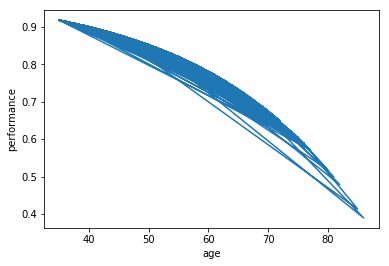

In [17]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('performance')
plt.show()

In [18]:
y=df2.bikeperf
x=df2.age

In [19]:
popt, pcov= curve_fit(curve, x, y)
popt

array([109.92036386,  30.58821783])

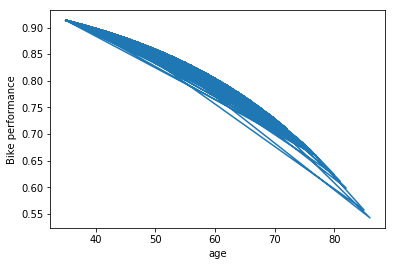

In [20]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('Bike performance')
plt.show()

In [21]:
y=df2.runperf
x=df2.age

In [22]:
popt, pcov= curve_fit(curve, x, y)
popt

array([104.49814909,  36.67624725])

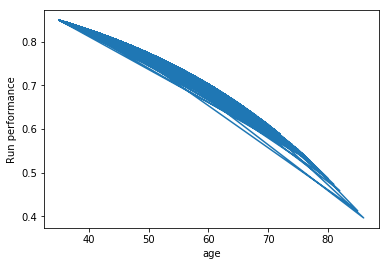

In [23]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('Run performance')
plt.show()

In [24]:
df3=race1[(race1.division!='PRO')&(race1.age>=35)&(race1.year==2012)]
df3

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
1797,2012,Christian Mueller,24,1,24,1191,40-44,44.0,NaN,DEU,...,112 mi,00:02:33,03:00:50,3.0139,0.331796,26.2 mi,08:54:17,8.9047,0.112300,-18.0
1804,2012,Sam Gyde,31,1,31,1410,35-39,41.0,Other,BEL,...,112 mi,00:02:20,03:04:53,3.0814,0.324528,26.2 mi,09:06:09,9.1025,0.109860,-21.0
1807,2012,Mathias Dietze,34,1,34,1681,30-34,36.0,Intl State,DEU,...,112 mi,00:02:42,03:10:32,3.1756,0.314901,26.2 mi,09:09:02,9.1506,0.109282,-26.0
1808,2012,Jamie Cascio,35,2,35,1334,35-39,43.0,NaN,CHE,...,112 mi,00:02:33,03:05:55,3.0986,0.322726,26.2 mi,09:10:09,9.1692,0.109061,-19.0
1809,2012,Sven Kunath,36,2,36,1639,30-34,37.0,NaN,DEU,...,112 mi,00:03:34,03:04:32,3.0756,0.325140,26.2 mi,09:11:23,9.1897,0.108817,-25.0
1810,2012,Sam Hume,37,3,37,1432,35-39,41.0,VIC,AUS,...,112 mi,00:02:42,03:02:39,3.0442,0.328494,26.2 mi,09:12:03,9.2008,0.108686,-21.0
1815,2012,Chuck Sloan,42,4,42,1485,35-39,39.0,OK,USA,...,112 mi,00:02:48,03:01:48,3.0300,0.330033,26.2 mi,09:14:09,9.2358,0.108274,-23.0
1816,2012,Bernhard Keller,43,2,43,1022,40-44,47.0,Intl State,AUT,...,112 mi,00:03:18,03:06:50,3.1139,0.321141,26.2 mi,09:14:32,9.2422,0.108199,-15.0
1817,2012,Jerome Joussemet,44,3,44,1172,40-44,44.0,FR,FRA,...,112 mi,00:04:29,03:00:40,3.0111,0.332105,26.2 mi,09:14:45,9.2458,0.108157,-18.0
1822,2012,Antonio Ferreira Da Silva Neto,48,4,49,1641,30-34,37.0,SP,BRA,...,112 mi,00:02:42,03:09:24,3.1567,0.316787,26.2 mi,09:16:46,9.2794,0.107766,-25.0


In [25]:
df4= race1[(race1.age>=30)&(race1.age<=34)&(race1.division!='PRO')&(race1.year==2012)]
df4

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
1806,2012,Márcio Neves,33,1,33,1859,25-29,33.0,NaN,PRT,...,112 mi,00:02:32,03:04:49,3.0803,0.324644,26.2 mi,09:08:43,9.1453,0.109346,-29.0
1811,2012,Adam Otstot,38,3,38,1750,30-34,34.0,VA,USA,...,112 mi,00:02:43,02:58:28,2.9744,0.336202,26.2 mi,09:12:38,9.2106,0.108571,-28.0
1812,2012,Kyle Visin,39,2,39,1864,25-29,33.0,CA,USA,...,112 mi,00:02:21,03:06:43,3.1119,0.321347,26.2 mi,09:13:18,9.2217,0.108440,-29.0
1814,2012,Gregory Farrell,41,3,41,1923,25-29,30.0,VIC,AUS,...,112 mi,00:03:00,03:06:40,3.1111,0.321430,26.2 mi,09:14:00,9.2333,0.108304,-32.0
1818,2012,Sam Baxter,45,4,45,1853,25-29,33.0,NaN,GBR,...,112 mi,00:06:14,03:07:59,3.1331,0.319173,26.2 mi,09:15:33,9.2592,0.108001,-29.0
1820,2012,Benjamin Williams,46,5,47,1863,25-29,32.0,HI,USA,...,112 mi,00:02:19,02:56:31,2.9419,0.339916,26.2 mi,09:16:19,9.2719,0.107853,-30.0
1828,2012,Victor Debil-Caux,53,6,55,1756,30-34,34.0,NaN,FRA,...,112 mi,00:02:19,03:13:49,3.2303,0.309569,26.2 mi,09:19:08,9.3189,0.107309,-28.0
1829,2012,Kyle Buckingham,54,7,56,1879,25-29,32.0,NaN,ZAF,...,112 mi,00:02:49,03:09:25,3.1569,0.316766,26.2 mi,09:19:21,9.3225,0.107267,-30.0
1832,2012,Müller Urs,57,8,59,1874,25-29,32.0,NaN,CHE,...,112 mi,00:02:48,03:11:22,3.1894,0.313539,26.2 mi,09:19:54,9.3317,0.107162,-30.0
1833,2012,Joe Thorne,58,9,60,1880,25-29,32.0,CA,USA,...,112 mi,00:02:51,02:52:39,2.8775,0.347524,26.2 mi,09:20:07,9.3353,0.107120,-30.0


In [26]:
df4.sort_values(by='swim_time')
swim=df4[:10]
swim
d= swim.swim_time.mean()
print(1/d)

0.9854061351385974


In [27]:
df4.sort_values(by='bike_time')
bike=df4[:10]
bike
e= bike.bike_time.mean()
print(1/e)

0.19691357660036587


In [28]:
df4.sort_values(by='run_time')
run=df4[:10]
f=run.run_time.mean()
print(1/f)

0.3246036589324435


In [29]:
df3.swimperf=d/df3.swim_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
df3.bikeperf=e/df3.bike_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
df3.runperf=f/df3.run_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
y=df3.swimperf
x=df3.age

In [33]:
popt, pcov= curve_fit(curve, x, y)
popt

array([100.11198377,  28.6891125 ])

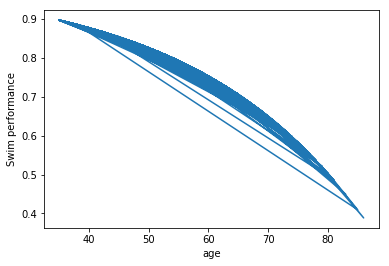

In [34]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('Swim performance')
plt.show()

In [35]:
y=df3.bikeperf
x=df3.age

In [36]:
popt, pcov= curve_fit(curve, x, y)
popt

array([105.62003856,  27.43591135])

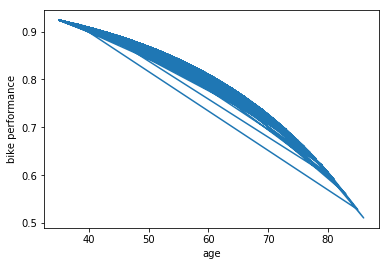

In [37]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('bike performance')
plt.show()

In [38]:
y=df3.runperf
x=df3.age

In [39]:
popt, pcov= curve_fit(curve, x, y)
popt

array([100.30612621,  36.93121771])

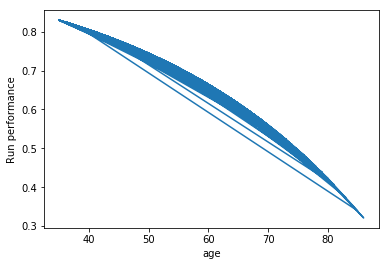

In [40]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('Run performance')
plt.show()

In [41]:
df5=race1[(race1.division!='PRO')&(race1.age<=39)&(race1.age>=30)]

In [42]:
df5.sort_values(by='swim_time')
swim=df5[:50]
swim
g= swim.swim_time.mean()
print(1/g)

0.9796238244514107


In [43]:
df5.sort_values(by='bike_time')
bike=df5[:50]
bike
h= bike.bike_time.mean()
print(1/h)

0.2038320423970648


In [44]:
df5.sort_values(by='run_time')
run=df5[:50]
i=run.run_time.mean()
print(1/i)

0.3153579312519711


Baseline time metric for the whole data representations are variables g, h, i.

In [45]:
df6=race1[(race1.division!='PRO')&(race1.age<=49)&(race1.age>=40)]

In [46]:
df6.sort_values(by='swim_time')
swim=df5[:50]
swim
j= swim.swim_time.mean()
print(1/j)

0.9796238244514107


In [47]:
df6.sort_values(by='bike_time')
bike=df6[:50]
bike
k= bike.bike_time.mean()
print(1/k)

0.20446552711212887


In [48]:
df6.sort_values(by='run_time')
run=df6[:50]
l=run.run_time.mean()
print(1/l)

0.3109839532280134


Mean times for each event for the age group 40-49 are variables j, k, l.

In [49]:
df7=race1[(race1.division!='PRO')&(race1.age<=59)&(race1.age>=50)]

In [50]:
df7.sort_values(by='swim_time')
swim=df7[:50]
swim
m= swim.swim_time.mean()
print(1/m)

0.8868393047179851


In [51]:
df7.sort_values(by='bike_time')
bike=df7[:50]
bike
n= bike.bike_time.mean()
print(1/n)

0.19446172993154953


In [52]:
df7.sort_values(by='run_time')
run=df7[:50]
o=run.run_time.mean()
print(1/o)

0.2888336895615504


Age group 50-59 the variables are m,n,o.


In [53]:
df8=race1[(race1.division!='PRO')&(race1.age<=69)&(race1.age>=60)]

In [54]:
df8.sort_values(by='swim_time')
swim=df8[:50]
swim
p= swim.swim_time.mean()
print(1/p)

0.7866582756450599


In [55]:
df8.sort_values(by='bike_time')
bike=df8[:50]
bike
q= bike.bike_time.mean()
print(1/q)

0.1728787774012863


In [56]:
df8.sort_values(by='run_time')
run=df8[:50]
r=run.run_time.mean()
print(1/r)

0.24304880419988334


In [57]:
df9=race1[(race1.division!='PRO')&(race1.age<=79)&(race1.age>=70)]

In [58]:
df9.sort_values(by='swim_time')
swim=df9[:50]
swim
s= swim.swim_time.mean()
print(1/s)

0.5871301080319398


In [59]:
df9.sort_values(by='bike_time')
bike=df9[:50]
bike
t2= bike.bike_time.mean()
print(1/t2)

0.14041394029599266


In [60]:
df9.sort_values(by='run_time')
run=df9[:50]
u=run.run_time.mean()
print(1/u)

0.176186616864583


In [61]:
df10=race1[(race1.division!='PRO')&(race1.age<=86)&(race1.age>=80)]

In [62]:
df10.sort_values(by='swim_time')
swim=df10[:50]
swim
v= swim.swim_time.mean()
print(1/v)

0.5394842530540804


In [63]:
df10.sort_values(by='bike_time')
bike=df10[:50]
bike
w= bike.bike_time.mean()
print(1/w)

0.12961268130473882


In [64]:
df10.sort_values(by='run_time')
run=df10[:50]
z=run.run_time.mean()
print(1/z)

0.1579108049591011


In [65]:
data={'swimperf' :[g/j, g/m, g/p, g/s, g/v],
      'bikeperf' :[h/k, h/n, h/q, h/t, h/w],
      'runperf' :[i/l, i/o, i/r, i/u, i/z],
       'agegroup' :['40-49', '50-59', '60-69', '70-79', '79-86'],
        'avg_age' :[44.5, 54.5, 64.5, 74.5, 82.5]}
total= pd.DataFrame(
    data, columns=['swimperf', 'bikeperf', 'runperf', 'agegroup', 'avg_age'])
total

,swimperf,bikeperf,runperf,agegroup,avg_age
0,1.000000,1.003108,0.986130,40-49,44.5
1,0.905286,0.954029,0.915892,50-59,54.5
2,0.803021,0.848143,0.770708,60-69,64.5
3,0.599342,0.049060,0.558688,70-79,74.5
4,0.550706,0.635880,0.500735,79-86,82.5


In [66]:
x=total.avg_age
y=total.swimperf

In [67]:
popt, pcov= curve_fit(curve, x, y)
popt

array([96.06543831, 19.03339715])

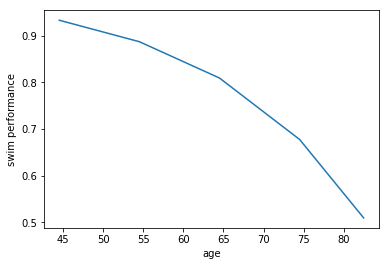

In [68]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('swim performance')
plt.show()

In [69]:
x=total.avg_age
y=total.bikeperf

In [70]:
popt, pcov= curve_fit(curve, x, y)
popt

array([93.58777354, 22.64877091])

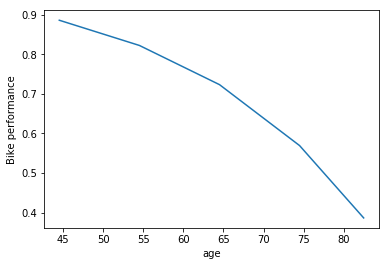

In [71]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('Bike performance')
plt.show()

In [72]:
y=total.runperf
popt, pcov= curve_fit(curve, x, y)
popt

array([94.0687348 , 19.00924234])

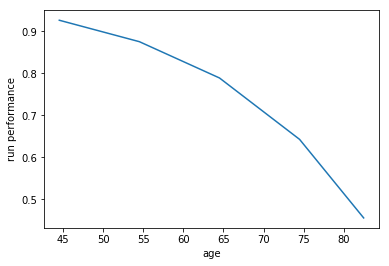

In [73]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('run performance')
plt.show()

For 2015 data

In [74]:
df11=race1[(race1.division!='PRO')&(race1.age<=34)&(race1.age>=30)&(race1.year==2015)]

In [75]:
df11.sort_values(by='swim_time')
swim=df11[:10]
swim
a1= swim.swim_time.mean()
print(1/a1)

0.9661835748792269


In [76]:
df11.sort_values(by='bike_time')
bike=df11[:10]
bike
b1= bike.bike_time.mean()
print(1/b1)

0.20554984583761562


In [77]:
df11.sort_values(by='run_time')
run=df11[:10]
run
c1= run.run_time.mean()
print(1/c1)

0.31220730565095217


In [78]:
df12=race1[(race1.division!='PRO')&(race1.age>=35)&(race1.year==2015)]
df12

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
7647,2015,Dan Stubleski,28,1,29,1737,35-39,40.0,MI,USA,...,112 mi,00:02:51,03:10:02,3.17,0.315457,26.2 mi,09:01:38,9.03,0.110742,-22.0
7648,2015,Charles Pennington,29,2,30,1692,35-39,38.0,West Sussex,GBR,...,112 mi,00:03:21,02:58:44,2.98,0.335570,26.2 mi,09:01:44,9.03,0.110742,-24.0
7650,2015,Ben Bell,31,1,32,1171,40-44,41.0,NSW,AUS,...,112 mi,00:03:10,03:00:52,3.01,0.332226,26.2 mi,09:03:53,9.06,0.110375,-21.0
7655,2015,Martin Huhndorf,36,3,37,1640,35-39,38.0,NaN,DEU,...,112 mi,00:03:42,03:13:34,3.23,0.309598,26.2 mi,09:06:48,9.11,0.109769,-24.0
7657,2015,Assad Attamimi,38,2,39,1165,40-44,40.0,SG,AUS,...,112 mi,00:02:25,03:02:38,3.04,0.328947,26.2 mi,09:07:37,9.13,0.109529,-22.0
7658,2015,Wim Van De Wielle,39,4,40,1757,35-39,37.0,BE,BEL,...,112 mi,00:03:51,03:03:51,3.06,0.326797,26.2 mi,09:08:13,9.14,0.109409,-25.0
7659,2015,Ivan Alvarez Gomez,40,5,41,1625,35-39,39.0,NaN,ESP,...,112 mi,00:03:21,03:04:31,3.08,0.324675,26.2 mi,09:09:24,9.16,0.109170,-23.0
7665,2015,Per Morten Ellingsen,45,3,47,1225,40-44,42.0,NO,NOR,...,112 mi,00:02:54,03:09:32,3.16,0.316456,26.2 mi,09:12:18,9.21,0.108578,-20.0
7671,2015,Carlo Van Lienden,50,6,53,1759,35-39,37.0,NL,NLD,...,112 mi,00:04:13,03:22:05,3.37,0.296736,26.2 mi,09:15:56,9.27,0.107875,-25.0
7672,2015,Bert Martens,51,8,54,1977,30-34,35.0,BE,BEL,...,112 mi,00:02:43,03:17:43,3.30,0.303030,26.2 mi,09:16:20,9.27,0.107875,-27.0


In [79]:
df12.swimperf=a1/df12.swim_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [80]:
df12.bikeperf=b1/df12.bike_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [81]:
df12.runperf=c1/df12.run_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [82]:
y=df12.swimperf
x=df12.age
popt, pcov= curve_fit(curve, x, y)
popt

array([97.47686807, 29.0192105 ])

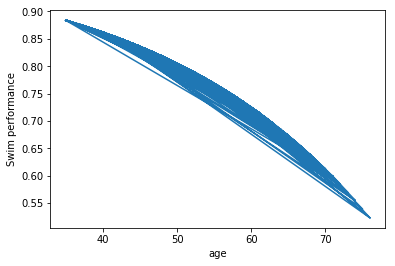

In [83]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('Swim performance')
plt.show()

In [84]:
y=df12.bikeperf
popt, pcov= curve_fit(curve, x, y)
popt

array([106.23044333,  32.82513566])

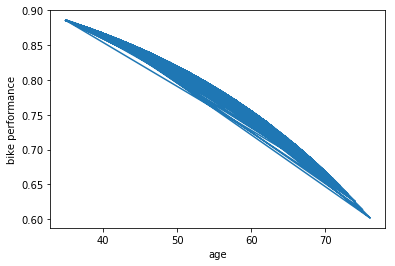

In [85]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('bike performance')
plt.show()

In [86]:
y=df12.runperf
popt, pcov= curve_fit(curve, x, y)
popt

array([99.26816961, 37.46251662])

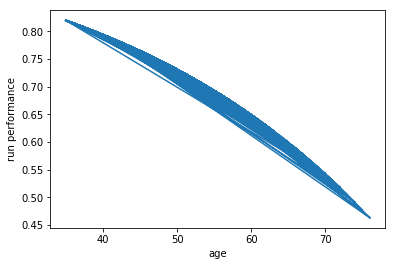

In [87]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('run performance')
plt.show()

In [88]:
df13= race1[(race1.age>=30)&(race1.age<=34)&(race1.division!='PRO')&(race1.year==2013)]
df13.head()

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
3676,2013,Kyle Buckingham,16,1,16,1846,30-34,32.0,NaN,ZAF,...,112 mi,00:02:24,02:56:50,2.95,0.338983,26.2 mi,08:37:26,8.6239,0.115957,-30.0
3687,2013,Clay Emge,27,1,27,1955,25-29,32.0,TX,USA,...,112 mi,00:03:03,03:00:33,3.01,0.332226,26.2 mi,08:47:36,8.7933,0.113723,-30.0
3690,2013,Matt Trautman,30,2,30,1995,25-29,31.0,ZA,ZAF,...,112 mi,00:02:19,03:08:42,3.15,0.317460,26.2 mi,08:49:12,8.8200,0.113379,-31.0
3698,2013,Andrew Drobeck,37,4,38,1785,30-34,34.0,MT,USA,...,112 mi,00:02:29,03:05:35,3.09,0.323625,26.2 mi,08:54:42,8.9117,0.112212,-28.0
3699,2013,Niels Brandt-Jørgensen,38,5,39,1845,30-34,33.0,NaN,DNK,...,112 mi,00:03:32,03:05:32,3.09,0.323625,26.2 mi,08:55:13,8.9203,0.112104,-29.0


In [89]:
df13.sort_values(by='swim_time')
swim=df13[:10]
swim
a2= swim.swim_time.mean()
print(1/a2)

1.0139828231309762


In [90]:
df13.sort_values(by='bike_time')
bike=df13[:10]
bike
b2= bike.bike_time.mean()
print(1/b2)

0.21194568256047336


In [91]:
df13.sort_values(by='run_time')
run=df13[:10]
run
c2= run.run_time.mean()
print(1/c2)

0.318674314850223


In [92]:
df14=race1[(race1.division!='PRO')&(race1.age>=35)&(race1.year==2013)]

In [93]:
df14.swimperf=a2/df14.swim_time
df14.bikeperf=b2/df14.bike_time
df14.runperf=c2/df14.run_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [94]:
y=df14.swimperf
x=df14.age
popt, pcov= curve_fit(curve, x, y)
popt

array([99.00185385, 28.32672095])

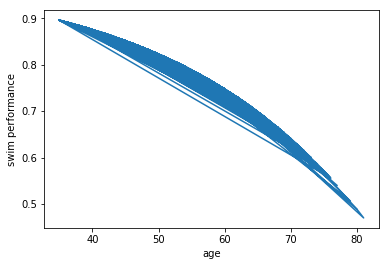

In [95]:
plt.plot(x, curve(x, *popt))
plt.xlabel('age')
plt.ylabel('swim performance')
plt.show()

In [96]:
y=df14.bikeperf
popt, pcov= curve_fit(curve, x, y)
popt

array([105.74866526,  30.2176474 ])

In [97]:
y=df14.runperf
popt, pcov= curve_fit(curve, x, y)
popt

array([97.53356683, 32.86989167])

In [98]:
df15= race1[(race1.age>=30)&(race1.age<=34)&(race1.division!='PRO')&(race1.year==2014)]
df15.head()

,year,name,genderRank,divRank,overallRank,bib,division,age,state,country,...,bikeDistance,t2,run,run_time,runperf,runDistance,overall,overall_time,perf_met1,age diff
5669,2014,Kramer Lukas,34,1,36,1833,30-34,32.0,NaN,DEU,...,112 mi,00:02:24,03:04:56,3.08,0.324675,26.2 mi,09:03:37,9.06,0.110375,-30.0
5671,2014,Marton Flander,35,2,38,2011,25-29,31.0,Bács-Kiskun,HUN,...,112 mi,00:03:15,03:04:42,3.08,0.324675,26.2 mi,09:06:12,9.10,0.109890,-31.0
5674,2014,Jens Gronbek,38,2,41,1811,30-34,33.0,NaN,DNK,...,112 mi,00:02:27,03:04:07,3.07,0.325733,26.2 mi,09:06:56,9.12,0.109649,-29.0
5677,2014,Martin Droell,41,3,44,1792,30-34,34.0,DE,DEU,...,112 mi,00:01:59,03:09:41,3.16,0.316456,26.2 mi,09:08:35,9.14,0.109409,-28.0
5691,2014,Sam Baxter,53,4,58,1753,30-34,33.0,NaN,GBR,...,112 mi,00:03:08,03:05:13,3.09,0.323625,26.2 mi,09:13:36,9.23,0.108342,-29.0


In [99]:
df15.sort_values(by='swim_time')
swim=df15[:10]
swim
a3= swim.swim_time.mean()
print(1/a3)

0.9746588693957114


In [100]:
df15.sort_values(by='bike_time')
bike=df15[:10]
bike
b3= bike.bike_time.mean()
print(1/b3)

0.20153164046755337


In [101]:
df15.sort_values(by='run_time')
run=df15[:10]
run
c3= run.run_time.mean()
print(1/c3)

0.3207184092366902


In [102]:
df16=race1[(race1.division!='PRO')&(race1.age>=35)&(race1.year==2014)]

In [103]:
df16.swimperf=a3/df16.swim_time
df16.bikeperf=b3/df16.bike_time
df16.runperf=c3/df16.run_time

C:\jupyter\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [104]:
y=df16.swimperf
x=df16.age
popt, pcov= curve_fit(curve, x, y)
popt

array([95.1413829 , 26.77191627])

In [105]:
y=df16.bikeperf
popt, pcov= curve_fit(curve, x, y)
popt

array([101.17040743,  29.58042361])

In [106]:
y=df16.runperf
popt, pcov= curve_fit(curve, x, y)
popt

array([99.00368832, 35.31594936])